# Behavioural Planning for Autonomous Highway Driving

We plan a trajectory using the _Optimistic Planning for Deterministic systems_ ([OPD](https://hal.inria.fr/hal-00830182)) algorithm.

##  Setup

We first import useful modules for the environment, agent, and visualization.

In [1]:
import gym
import sys
sys.path.append("/home/baiming/highway_multiagent_env") 
import highway_env

# import sys
# from tqdm import tnrange

# from utils import record_videos, capture_intermediate_frames

from model import ActorCritic
from agent import Agent

import torch
from torch import optim
import numpy as np


# Visualisation
import sys
from tqdm import tnrange
# !git clone https://github.com/eleurent/highway-env.git > /dev/null 2>&1
# !pip install gym pyvirtualdisplay > /dev/null 2>&1
# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# sys.path.insert(0, './highway-env/scripts/')
from utils import record_videos,  capture_intermediate_frames

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
mean = 103.0
std = 21.7

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent = Agent()
optimizer = optim.Adam(agent.ac.parameters(),lr=3e-4)
pytorch_total_params = sum(p.numel() for p in agent.ac.parameters())
print(pytorch_total_params)
#242248

9986


In [4]:
max_episode = 1
step_count = 0
save_model_count = 0
save_model_frequency = 100

## Run an episode

In [5]:
# import os
# os.environ["SDL_VIDEODRIVER"] = "dummy"
from agent import compute_returns

env = gym.make("intersection-multiagent-v0")
obs, done = env.reset(), False
img = env.render(mode='rgb_array')
img_grey = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
print(np.max(img_grey))
img_grey = (img_grey - mean)/std
img_grey = img_grey.reshape((1,224,224))
img_grey = torch.FloatTensor([img_grey]).to(device)
for i in range(max_episode):
    log_probs = [[], [], [], []]
    values    = [[], [], [], []]
    rewards   = []
    masks     = []
    entropy = 0
    save_model_count += 1
    for _ in range(50):
        action = []
        for i in range(len(obs)):
            ind_obs = obs[i]
#             print('1',torch.cuda.memory_allocated(device))
            _, ind_action, log_prob, value, ent = agent.act(img_grey, ind_obs[1:3])
#             print('2',torch.cuda.memory_allocated(device))
            action.append(ind_action)
            log_probs[i].append(log_prob)
            values[i].append(value)
            entropy += ent
        
        next_obs, reward, done, _ = env.step(action)
        rewards.append(torch.FloatTensor([reward]).unsqueeze(1).to(device))
        masks.append(torch.FloatTensor([1 - done]).unsqueeze(1).to(device))
        img = env.render(mode='rgb_array')
        img_grey = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        print(np.max(img_grey))
        img_grey = (img_grey - mean)/std
        img_grey = img_grey.reshape((1,224,224))
        img_grey = torch.FloatTensor([img_grey]).to(device)
        obs = next_obs
        if done:
            break
    sum_reward = sum(rewards)
    print(sum_reward)
    returns = []
    for i in range(len(obs)):
        ind_obs = obs[i]
        _, _, _, next_value, _ = agent.act(img_grey, ind_obs[1:3])
        returns.append(compute_returns(next_value, rewards, masks))

    log_probs = torch.FloatTensor(log_probs).to(device)
    returns  = torch.FloatTensor(returns).to(device).detach()
    values  = torch.FloatTensor(values).to(device)
    
    advantage = returns - values
    actor_loss  = -(log_probs * advantage.detach()).mean()
    critic_loss = advantage.pow(2).mean()
    print(actor_loss, critic_loss, entropy)
    loss = actor_loss + 0.5 * critic_loss - 0.1 * entropy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    state = env.reset()

env.close()

/home/baiming/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


error: No available video device

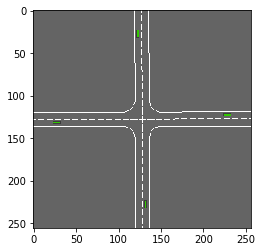

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [6]:
# print(np.shape(img))
img1 = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

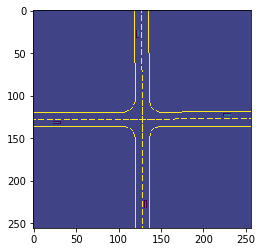

In [7]:
plt.imshow(img1)

In [8]:
print(np.shape(img1))

(256, 256)


In [4]:
a = []
a = a.append[0]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [5]:
import pandas

In [17]:
df = pandas.DataFrame()

In [21]:
df = df.append(pandas.DataFrame([a]))

In [16]:
a = {'a':1, 'b':2}

In [22]:
print(df)

   a  b
0  1  2
0  1  2


In [23]:
print(pandas.DataFrame([a]))

   a  b
0  1  2


In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [22]:
# print(img1)

print(img1)

[[[-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]
  [-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]
  [-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]
  ...
  [-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]
  [-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]
  [-0.12741117 -0.12741117 -0.12741117 ... -0.12741117 -0.12741117
   -0.12741117]]]


In [10]:
print(np.mean(img1))

103.02552294158937


In [12]:
a = []
a.append([0])

In [13]:
print(a)

[[0]]


In [16]:
import torch
a = torch.tensor([1,2])
len(a)

2

In [17]:
b = []
b.append(a)

In [18]:
b

[tensor([1, 2])]

In [19]:
a[0]

tensor(1)